# Graphs

그래프는 정말 어려운 주제이고 많은 내용이 연관이 되어있습니다. 기본적인 내용만 살펴보면요.

- 그래프를 구성하는 방법에서부터 *adjacency list*, *adjacency matrix* 를 둘 수가 있구요. 
- 그래프 데이터베이스를 구성할 때에는 더 어렵습니다. *(V, E, V)* 의 triple notation 으로 구성하던지, *edge*, *node*의 형태로 따로 구성할 수가 있습니다.
- 그래프의 방향성이 있냐 없냐에 따라서 *direct graph*, *undirect graph* 를 둘 수가 있구요. 
- 연결됨의 방식에 따라 *strongly connected components*, *weakly connected components*를 찾아볼 수 있구요.
- 방향성이 없으며 cycle이 없는 애들을 *tree*, *forest* 라고 부르기도 하죠. 이런 애들을 찾는 재밌는 알고리즘 중에 하나가 *minimum spanning tree* 입니다.
- 방향성이 있는 애들의 줄을 세우는 것을 *topological sort* 라고 합니다.
- 그래프에서 node, edge를 읽는 방법이 여러가지가 있는데요. 물론 효율적으로요. 가장 간단하게는 *BFS*, *DFS*가 있구요. *shortest path* 찾는것도 재밌고, *maximum flow* 도 재밌습니다.

## 그래프 표현 방식

이번장에 있는 문제들은 **adjancency list** 방식을 사용합니다:
- `class GraphVertex`로 모든것을 해결합니다. 그리고, `List[GraphVertex]`로 그래프를 표현하죠.
- 리스트 문제들이 `class List`로 표현되는 것과 같은 이치죠.

```python
class GraphVertex:
    def __init__(self) -> None:
        self.label = label
        self.edges: List['GraphVertex'] = []
```

## BFS vs DFS

Graph search 에 있어서 가장 간단한 알고리즘들입니다. 18장과 leetcode에 가장 많이 있는 문제들이구요.

### How they work?

Depth를 따라서 먼저 찾아보느냐, Breadth를 우선시해서 찾아보느냐의 차이일 뿐이죠. 자세한 구현은 아래 예제들이나 인터넷을 참고하세요.
- DFS는 먼저 깊이를 가기에 stack을 사용합니다. 명시적으로 stack을 사용해서 node를 탐색하던, recursion을 사용하면 됩니다.
- BFS는 먼저 가까운 모든 노드들을 가기에 queue를 사용하여 iterative한 구현을 하면 됩니다.

### Complexity

복잡도는 항상 같습니다. 외워두세요.
- Time Complexity: O(V + E)
- Space Complexity: O(V)

### Application

- DFS: **Looking for cycles**, **Looking for connected components**
- BFS: **Optimization**, **Finding path quickly**

## 18.0 Can Team A beat Team B?

- 문제: 스포츠 경기에서 여러팀들의 경기 결과가 있다. 예들들어, A beats B, B beats C, C beats D... 이런식이다. 임의의 팀 A, B에 대해서 A > C > ... > B 의 형태인 transitively relative besting 을 어떻게 찾을까? 결과를 T/F로 리턴하자.
- 타입: **BFS/DFS (basic search)**
- 복잡도: O(V+E) for Time, O(V) for Space

In [1]:
import collections

MatchResult = collections.namedtuple('MatchResult', ('winning_team', 'losing_team'))


def can_tam_a_beat_team_b(matches, team_a, team_b):
    def build_graph():
        g = collections.defaultdict(set)
        for match in matches:
            g[match.winning_team].add(match.losing_team)
        return g
    
    def dfs(g, curr, dest, visited=set()):
        if curr == dest:
            return True
        elif curr in visited or curr not in graph:
            return False
        visited.add(curr)
        return any(dfs(g, team, dest, visited) for team in graph[curr])
    
    return dfs(build_graph(), team_a, team_b)

## 18.4 Deadlock Detection

- 문제: deadlock은 여러 lock들간에 cycle이 생겨서 발생할 수 있다. 주어진 그래프 g 에서 사이클이 있는지 확인하는 프로그램을 짜라.
- 타입: **DFS with marking (looking for cycles)**
- 힌트: 일반적인 DFS로는 안된다. Marking 을 3가지 타입으로 해야한다 (처음 방문, 방문중, 방문 끝)
    - WHITE: 처음방문
    - GRAY: 방문중
    - BLACK: 방문끝
- 복잡도: O(V+E) for Time, O(V) for Space

In [2]:
from typing import List


class GraphVertex:
    WHITE, GRAY, BLACK = range(3)
    
    def __init__(self) -> None:
        self.color = GraphVertex.WHITE
        self.edges: List['GraphVertex'] = []
            
            
def is_deadlocked(graph: List[GraphVertex]) -> bool:
    def has_cycle(curr):
        if curr == GraphVertex.GRAY:
            return True
        
        curr.color = GraphVertex.GRAY
        if any(nxt.color != GraphVertex.BLACK and has_cycle(nxt)
               for nxt in cur.edges):
            return True
        curr.color = GraphVertex.BLACK
        return False
    
    return any(vertex.color == GraphVertex.WHITE and has_cycle(vertex)
               for vertex in graph)

## 18.5 Clone a Graph

- 문제: Digraph를 어떻게 clone하냐?
- 타입: **BFS/DFS (navigate graph with map)**
- 복잡도: O(V+E) for Time, O(V) for Space

In [3]:
from typing import List
import collections


class GraphVertex:
    def __init__(self) -> None:
        self.label = label
        self.edges: List['GraphVertex'] = []

            
def clone_graph(graph: GraphVertex) -> GraphVertex:
    if graph is None:
        return None
    
    q = collections.deque([graph])
    vertex_map = {graph: GraphVertex(graph.label)}
    while q:
        v = q.popleft()
        for e in v.edges:
            if e not in vertex_map:
                vertex_map[e] = GraphVertex(e.label)
                q.append(e)
            vertex_map[v].edges.append(vertex_map[e])
    return vertex_map[graph]

## 18.6 Making Wired Connections

- 문제: PCB 빵판이 있고, 각핀을 두개의 색으로만 칠할 수 있다. 핀의 연결을 다른 색으로만 가능하다고 할때, 이 그래프가 제대로 구성된것인지 체크하라.
- 타입: **BFS, Bi-partite graph**
- 복잡도: O(V+E) for Time, O(V) for Space

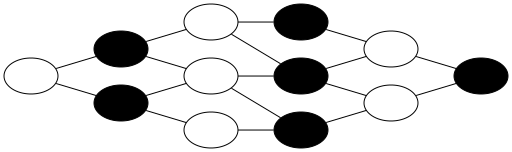

In [4]:
# 이런식으로 Black, White 로 칠할수 있다고 하죠.

import graphviz

g = graphviz.Graph(graph_attr={'rankdir': 'LR'})

for i in range(12):
    if i in (0, 2, 5, 8, 7, 10):
        g.node(str(i), label='')
    else:
        g.node(str(i), label='', fillcolor='black', style='filled')
    
g.edge('0', '1')
g.edge('0', '4')
g.edge('1', '2')
g.edge('1', '5')
g.edge('2', '3')
g.edge('2', '6')
g.edge('3', '7')
g.edge('4', '5')
g.edge('4', '8')
g.edge('5', '6')
g.edge('5', '9')
g.edge('6', '7')
g.edge('6', '10')
g.edge('7', '11')
g.edge('8', '9')
g.edge('9', '10')
g.edge('10', '11')

g

In [5]:
from typing import List
import collections


class GraphVertex:
    def __init__(self) -> None:
        self.edges: List['GraphVertex'] = []


def is_placement_feasible(graph: List[GraphVertex]) -> bool:
    placements = collections.defaultdict(set)
    
    def bfs(v: GraphVertex):
        """한 트리에 대해서 WHITE 나 BLACK 으로 다 assign 해줌"""
        if v in placements['WHITE'] or v in placements['BLACK']:
            return True
        
        q = collections.deque([v])
        placements['WHITE'].add(v)
        
        while q:
            curr = q.popleft()
            curr_color = 'WHITE' if curr in placements['WHITE'] else 'BLACK'
            next_color = 'WHITE' if curr_color == 'WHITE' else 'BLACK'
            for n in curr.edges:
                if n in placements[curr_color]:
                    return False
                elif n not in placements[next_color]:
                    placements[next_color].add(n)
                    q.append(n)
        return True
    return all(bfs(v) for v in graph)

## 18.7 Word Ladder

Leetcode [127. Word Ladder](https://leetcode.com/problems/word-ladder/), [126. Word Ladder II](https://leetcode.com/problems/word-ladder-ii/) 에 있는 문제들입니다. 첫문제는 가능한 경우 가장 짧은 변환 숫자를 반환하는 것이고, 두번째 문제는 변환 가능한 모든 리스트를 반환하는 문제입니다.

- 문제: 사전이 주어져있고, 시작단어, 끝단어가 있다. 단어에서 매 턴마다 한글자를 바꿀수가 있다. 사전에 그 단어가 있으면 그 턴에서 다음 단어로 넘어간다. 그랬을때에 시작 단어에서 끝 단어까지 갈 수 있는가? 가능하면 가장 짧게 몇번만에 갈 수 있는가?
- 타입: **BFS (finding path quickly)**
- 풀이방법:
    - 내방법: 아래의 코드는 사전을 우선적으로 preprocessing 함
    - 책방법: 매턴마다 단어에서 새 단어를 만들어냄. 그럼, 매턴마다 (length of word) * (26 characters) 연산을 해야함.
- 복잡도:
    - V = number of words in dictionary
    - E = V\*V in the worst case
    - 내방법: O($V$) for space, O($V+E$) = O($V^2$) for time
    - 책방법: O($V$) for space, O($V+E$) = O($V^2$) for time

In [6]:
from typing import List
import collections


def ladder_length(beginWord: str, endWord: str, wordList: List[str]) -> int:
    if not wordList:
        return 0

    word_len = len(wordList[0])
    word_dict = collections.defaultdict(list)
    for word in wordList:
        for i in range(word_len):
            word_dict['_'.join([word[:i], word[i+1:]])].append(word)
    visited = {beginWord}
    queue = collections.deque([(beginWord, 1)])

    while queue:
        word, count = queue.popleft()
        if word == endWord:
            return count
        for i in range(word_len):
            next_cand = '_'.join([word[:i], word[i+1:]])
            if next_cand in word_dict:
                next_words = [word for word in word_dict[next_cand] if word not in visited]
                if next_words:
                    visited.update(next_words)
                    queue.extend([(word, count+1) for word in next_words])

    return 0

In [7]:
assert ladder_length('hit', 'cog', ["hot","dot","dog","lot","log","cog"]) == 5
assert ladder_length('hit', 'cog', ["hot","dot","dog","lot","log"]) == 0

## 18.8 Team Photo Day 2

- 문제: 18.0의 경기에 이기는 순서를 정하는 문제와 비슷하다. 단, "가장 긴" 리스트를 찾는것이다. 그러려면 BFS, DFS를 사용해서 모든 path를 탐색한 후에 가장 긴 path를 반환하면 된다.
- 타입: **Topological sort (finding paths)**
- 복잡도: O(V+E) for Time, O(V) for Space

In [8]:
from typing import List
import collections


class GraphVertex:
    def __init__(self) -> None:
        self.max_depth = 0
        self.edges: List['GraphVertex'] = []


def find_largest_number_of_teams(graph: List[GraphVertex]) -> int:
    def dfs(curr: GraphVertex) -> int:
        curr.max_depth = max((curr.max_depth if curr.max_depth > 0 else max(dfs(losers)) + 1
                              for losers in curr.edges), default=1)
        return curr.max_depth
    
    return max(dfs(team) for team in graph)

## Alien Dictionary

Leetcode 의 [269. Alien Dictionary](https://leetcode.com/problems/alien-dictionary/) 문제가 전형적인 **topological sort** 의 문제입니다. [Wikipedia의 topological sorting](https://en.wikipedia.org/wiki/Topological_sorting)에 따르면 크게 두 개의 알고리즘으로 풀 수 있습니다:
- **Khan's algorithm**: 아주 직관적인 알고리즘입니다. incoming edge 가 없는 녀석들을 먼저 찍어주고, 찍어주는 녀석들에서 뻗어 나오는 node 들을 조사해서, 만약 그 incoming 들에서만 오는 node 가 있으면 다음번에 찍어주는 식으로 하면 됩니다. 자료구조는 incoming, outgoing edges 들을 따로 관리해주면 되구요. 자세한 설명은 위키피디아 링크를 참조해주세요.
- **DFS based algorithm**: 위의 cycle detection 과 비슷합니다. DFS를 하면서 3가지의 상태로 색칠을 하는데요. WHITE 가 초기화, GRAY 가 나오면 에러, BLACK 일 경우에 프린트를 해주는데, stack 에 넣듯 거꾸로 프린트 해주면 됩니다.

## Reconstruct Itinerary
Leetcode 의 [332. Reconstruct Itinerary](https://leetcode.com/problems/reconstruct-itinerary/) 가 **topological sort 와 비슷한 문제**입니다. 우선, topological sort 가 아닌 이유는 **DAG 가 아닙니다!** 대신, 다른 조건들이 주어지는데요:

- start node 가 주어집니다. 무조건 JFK 부터 하라고 하죠.
- 모든 edge 를 훓으라고 합니다. DFS, BFS 뭔가를 다 해야할 것 같죠?
- 방문하는 여러가지 방법이 생기면 lexicographical order 로 방문하라고 하네요.
- 답: topological sort + DFS 의 변형으로 하시면 됩니다.

## Minimum Spanning Tree
- **Kruskal's algorithm**:
- **Prim algorithm**:

## Shortest Path - Dijkstra's algorithm

최단 경로를 구하는 알고리즘은 다음 두 개가 유명합니다.
- **Dijkstra's algorithm**
- **Bellman-Ford algorithm**

"원래 알고리즘은 두 꼭짓점 간의 가장 짧은 경로를 찾는 알고리즘이지만, 더 일반적인 변형은 한 꼭짓점을 "소스" 꼭짓점으로 고정하고 그래프의 다른 모든 꼭짓점까지의 최단경로를 찾는 알고리즘으로 최단 경로 트리를 만드는 것이다." 라고 합니다. ([wikipedia](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm))


In [5]:
# Dijkstra's algorithm - O(V**2)
#
# 얼핏보면 바깥쪽 while 이 O(V), 안쪽 for 가 O(E), 즉 O(EV) 처럼 보입니다
# 하지만, 잘 생각해보면 안쪽 for 는 모든 E 에 대해서 도는게 아니라
# 각각의 V 에 대한 edge 만 돌기 때문에 안쪽 for 도 기껏해야 O(V) 밖에 안되죠 => O(V**2)
# 게다가, lin 28에서 보듯, queue 에서 뺄 때에 모든 vertex 를 보며 min() 연산을 합니다 => O(V**2)
# 즉, 최종 복잡도는 O(V**2) 입니다

from typing import List, Dict
import collections


class GraphVertex:
    def __init__(self) -> None:
        self.max_depth = 0
        self.edges: Dict['GraphVertex', int] = dict()


def dijkstra(graph: List[GraphVertex], source: GraphVertex) -> Dict:
    dist, prev, queue = dict(), dict(), []
    for vertex in graph:
        dist[vertex] = float('inf')
        prev[vertex] = None
        queue.append(vertex)
        
    dist[source] = 0
    while queue:
        vertex = min((d, vertex) for vertex, d in dist.items())[1]
        queue.remove(vertex)
        
        for neighbor, d in vertex.edges.items():
            if dist[vertex] + d < dist[neighbor]:
                dist[neighbor] = dist[vertex] + d
                prev[neighbor] = vertex
    
    return dist

In [4]:
# Dijkstra's algorithm - O(E + V log V)
#
# O(V log V): 바깥의 while 이 O(V), heappop() 이 O(log V)
# O(E): 모든 edge 에 대해서 decrease_priority() 연산을 함 => 그러면 O(E log V) 이어야? 모르겠당
# 암튼 O(E + V log V) 라고...

from typing import List, Dict
import collections
import heapq


class GraphVertex:
    def __init__(self) -> None:
        self.max_depth = 0
        self.edges: Dict['GraphVertex', int] = dict()


def dijkstra(graph: List[GraphVertex], source: GraphVertex) -> Dict:
    dist, prev, queue = dict(), dict(), []
    dist[source] = 0
    
    for vertex in graph:
        if vertex != source:
            dist[vertex] = float('inf')
        prev[vertex] = None
        queue.append((dist[vertex], vertex))
        
    queue = heapq.heapify(queue)    
    while queue:
        vertex = heapq.heappop(queue)
        
        for neighbor, d in vertex.edges.items():
            if dist[vertex] + d < dist[neighbor]:
                dist[neighbor] = dist[vertex] + d
                prev[neighbor] = vertex
                # TODO: 수도코드로 아래처럼 작성되어야 합니다
                # 파이썬에서도 가능은 하겠지만 지금의 자료구조로는 쉽게 안되네요
                # heapq.decrease_priority(queue, vertex, replace value with dist[vertex] + d)
    
    return dist¡

## Shortest path - Bellman Ford
dijkstra 는 음수의 에지를 가지면 안됩니다. 벨만 포드가 그게 가능하죠. 다음의 속성들이 있습니다:

- Works on negative edges
- O(EV) vs O(E + V log V)
- Can find negative cycles

## 24.35 Test if Arbitrage is possible

- 문제: exchange rate 들이 있을 때에, 어떤 통화를 통해서 어떤 통화로 가던 arbitrage 가 존재하는가?
- 타입: **Bellman-Ford (finding negative cycle)**
- 복잡도: O(EV) for Time, O(V) for Space
- 설명: 그래프에서 edge 대신 `w'(e) = -log w(e)`로 바꾼 후에 negative cycle 을 찾는 문제로 바꾸면 딱 Bellman Ford 가 됨. 문제를 변행해서 모델링해야 하기에 고난이도 임

In [6]:
def is_arbitrage_exist(graph: List[List[float]]) -> bool:
    def bellman_ford(graph, source):
        # TODO
        pass

## TODO: Advanced Graph Algorithms

- Strongly/weakly connected components
- Shortest path: A* algorithm
- Matching
- Maximum flow